In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import datasets, transforms
from torch.autograd import Variable

In [2]:
transformations = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

In [3]:
def dataloader(train_batch_size, test_batch_size):
    train_dataloader = torch.utils.data.DataLoader(
        torchvision.datasets.MNIST(root='data', train=True, download=True,
                                   transform=transformations),
        batch_size=train_batch_size, shuffle=True)
    test_dataloader = torch.utils.data.DataLoader(
        torchvision.datasets.MNIST(root='data', train=False, download=True,
                                   transform=transformations),
        batch_size=test_batch_size, shuffle=True)
    return train_dataloader, test_dataloader

In [4]:
class CNN1(nn.Module):
    def __init__(self):
        super(CNN1, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.linear1 = nn.Linear(16 * 5 * 5, 100)
        self.linear2 = nn.Linear(100, 80)
        self.linear3 = nn.Linear(80, 40)
        self.linear4 = nn.Linear(40, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(x.size(0), -1)
        x = F.leaky_relu(self.linear1(x))
        x = F.leaky_relu(self.linear2(x))
        x = F.leaky_relu(self.linear3(x))
        x = self.linear4(x)
        return x

In [5]:
class CNN2(nn.Module):
    def __init__(self):
        super(CNN2, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.conv3 = nn.Conv2d(16, 32, 2)
        self.linear1 = nn.Linear(32 * 2 * 2, 100)
        self.linear2 = nn.Linear(100, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = F.max_pool2d(F.relu(self.conv3(x)), 2)
        x = x.view(x.size(0), -1)
        x = F.leaky_relu(self.linear1(x))
        x = self.linear2(x)
        return x

In [6]:
def train_model(model, optimizer, train_loader, max_epochs):
    epoch_list = []
    loss_list = []
    accuracy_list = []
    for epoch in range(max_epochs):
        total_loss = 0
        total_samples = 0
        correct_samples = 0
        epoch_list.append(epoch)
        model.train()
        counter = 0
        for batch_index, (data, target) in enumerate(train_loader):
            optimizer.zero_grad()
            output = model(data)
            loss = Floss(output, target)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            batch_samples = target.size(0)
            total_samples += batch_samples
            predicted = output.argmax(dim=1, keepdim=True)
            correct_samples += predicted.eq(target.view_as(predicted)).sum().item()
            counter += 1
        accuracy = (correct_samples / total_samples) * 100
        loss_list.append(total_loss / counter)
        accuracy_list.append(accuracy)
        print("Epoch:", epoch + 1, "Accuracy:", round(accuracy, 2), 'Total Loss per batch:', total_loss / counter)
    return epoch_list, loss_list, accuracy_list

In [7]:
train_loader, test_loader = dataloader(100, 1000)

model1 = CNN1()
learning_rate = 0.01
optimizer1 = torch.optim.Adam(model1.parameters(), lr=learning_rate)
Floss = nn.CrossEntropyLoss()
max_epochs = 20
epoch_list_m1, loss_list_m1, accuracy_list_m1 = train_model(model1, optimizer1, train_loader, max_epochs)

[W NNPACK.cpp:51] Could not initialize NNPACK! Reason: Unsupported hardware.


Epoch: 1 Accuracy: 91.53 Total Loss per batch: 0.2641582871057714
Epoch: 2 Accuracy: 97.38 Total Loss per batch: 0.09727270202944055
Epoch: 3 Accuracy: 97.64 Total Loss per batch: 0.08997284205494603
Epoch: 4 Accuracy: 97.77 Total Loss per batch: 0.08787800123721051
Epoch: 5 Accuracy: 97.93 Total Loss per batch: 0.08128348422294948
Epoch: 6 Accuracy: 97.9 Total Loss per batch: 0.0880583963075575
Epoch: 7 Accuracy: 97.85 Total Loss per batch: 0.08625983986343878
Epoch: 8 Accuracy: 98.78 Total Loss per batch: 0.04660198013691115
Epoch: 9 Accuracy: 98.97 Total Loss per batch: 0.037349173975235316
Epoch: 10 Accuracy: 98.9 Total Loss per batch: 0.03986332231977334
Epoch: 11 Accuracy: 98.74 Total Loss per batch: 0.04650287237838105
Epoch: 12 Accuracy: 99.02 Total Loss per batch: 0.034564470048013995
Epoch: 13 Accuracy: 98.28 Total Loss per batch: 0.07130293206190497
Epoch: 14 Accuracy: 98.98 Total Loss per batch: 0.03813171793461758
Epoch: 15 Accuracy: 98.95 Total Loss per batch: 0.042067506

In [8]:
model2 = CNN2()
optimizer2 = torch.optim.Adam(model2.parameters(), lr=learning_rate)

epoch_list_m2, loss_list_m2, accuracy_list_m2 = train_model(model2, optimizer2, train_loader, max_epochs)

Epoch: 1 Accuracy: 93.38 Total Loss per batch: 0.20794800588861106
Epoch: 2 Accuracy: 97.35 Total Loss per batch: 0.09087367561180144
Epoch: 3 Accuracy: 97.46 Total Loss per batch: 0.0863441897641557
Epoch: 4 Accuracy: 97.74 Total Loss per batch: 0.07875029920154096
Epoch: 5 Accuracy: 97.72 Total Loss per batch: 0.07809700736252126
Epoch: 6 Accuracy: 97.82 Total Loss per batch: 0.07717692118681346
Epoch: 7 Accuracy: 97.78 Total Loss per batch: 0.08078428328134275
Epoch: 8 Accuracy: 97.72 Total Loss per batch: 0.08300316583559228
Epoch: 9 Accuracy: 97.78 Total Loss per batch: 0.08015971457508082
Epoch: 10 Accuracy: 98.04 Total Loss per batch: 0.07066465700200449
Epoch: 11 Accuracy: 97.89 Total Loss per batch: 0.07679657371307258
Epoch: 12 Accuracy: 97.94 Total Loss per batch: 0.07500118070932027
Epoch: 13 Accuracy: 97.78 Total Loss per batch: 0.08399127393495291
Epoch: 14 Accuracy: 98.09 Total Loss per batch: 0.06819096172441884
Epoch: 15 Accuracy: 97.96 Total Loss per batch: 0.07185522

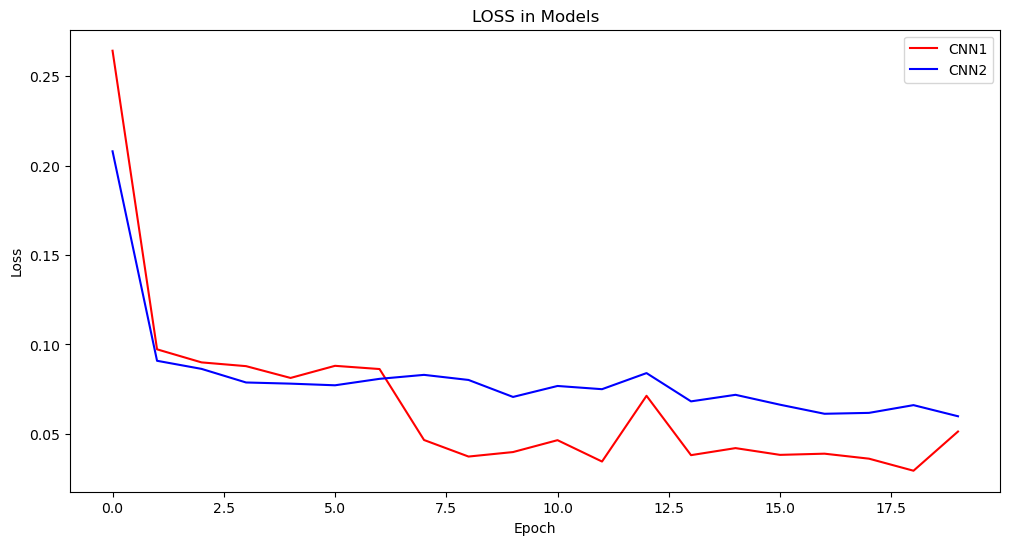

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(epoch_list_m1, loss_list_m1, color='r')
plt.plot(epoch_list_m2, loss_list_m2, color='b')
plt.title("LOSS in Models")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['CNN1', 'CNN2'])
plt.show()

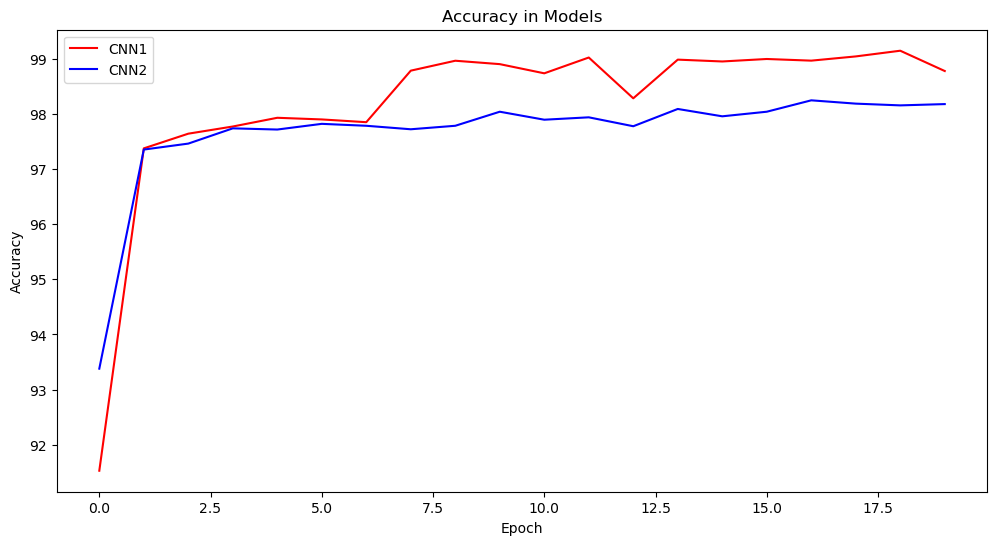

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(epoch_list_m1, accuracy_list_m1, color='r')
plt.plot(epoch_list_m2, accuracy_list_m2, color='b')
plt.title("Accuracy in Models")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['CNN1', 'CNN2'])
plt.show()